### Cement Strength Prediction with Neural Network

**Introduction**

We are going to build a regression model using neural network to predict cement strength. The data is provided by IBM as a part of the IBM AI Engineering Professional Certificate. We are going to use `Keras` to build our neural network regression model and optimize it. The entire process is divided into four parts (A, B, C and D). Detailed description of each part is provided below.

**Part A**

1. Import relevant libraries and data
2. Perform exploratory data analysis (EDA)
3. Divide the into train and test data sets
4. Build a baseline neural network model with one hidden layer with 10 nodes.
5. Train the data with 50 epochs and test it on test data.

In [107]:
# import libraries

from keras.src.layers import Dense
from keras.src.models import Sequential
from keras.src.layers import Input

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [108]:
#import data

data = pd.read_csv('concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


**Perform EDA**

In [109]:
data.shape

(1030, 9)

In [110]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [112]:
#check if data contains null values
data.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [113]:
#identifying predictors and target

predictors = data[data.columns[data.columns != 'Strength']]
target = data['Strength']

In [114]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [115]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

**Build the Neural Network Regression Model**

We are going to build a neural network with one hidden layer with 10 nodes and a ReLU activation function. For optimization, we are using `adam` function and `MSE` as the loss function. 

$$MSE = \frac{1}{n} \sum^n_{i = 1} (y_{true, i} - y_{pred, i})^2$$

In [116]:
n_cols = predictors.shape[1]

In [126]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [127]:
#initialize the model
model = regression_model()

In [128]:
lst_mse = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 50, verbose = 2)
    predictions = model.predict(X_test)
    lst_mse.append(mean_squared_error(y_test, predictions))
    print('iteration ' + str(i + 1))

Epoch 1/50
16/16 - 1s - 80ms/step - loss: 45120.8984 - val_loss: 28100.6777
Epoch 2/50
16/16 - 0s - 12ms/step - loss: 15245.7998 - val_loss: 8882.5537
Epoch 3/50
16/16 - 0s - 13ms/step - loss: 5688.0239 - val_loss: 4863.2666
Epoch 4/50
16/16 - 0s - 13ms/step - loss: 4533.4336 - val_loss: 4461.4580
Epoch 5/50
16/16 - 0s - 16ms/step - loss: 4211.3247 - val_loss: 4211.0796
Epoch 6/50
16/16 - 0s - 12ms/step - loss: 3857.3057 - val_loss: 3995.1953
Epoch 7/50
16/16 - 0s - 11ms/step - loss: 3586.5039 - val_loss: 3759.1609
Epoch 8/50
16/16 - 0s - 14ms/step - loss: 3354.5112 - val_loss: 3526.6843
Epoch 9/50
16/16 - 0s - 20ms/step - loss: 3149.5354 - val_loss: 3307.6741
Epoch 10/50
16/16 - 0s - 18ms/step - loss: 2977.3320 - val_loss: 3160.7627
Epoch 11/50
16/16 - 0s - 18ms/step - loss: 2835.3645 - val_loss: 3002.3142
Epoch 12/50
16/16 - 0s - 18ms/step - loss: 2701.9092 - val_loss: 2908.7451
Epoch 13/50
16/16 - 0s - 30ms/step - loss: 2593.6895 - val_loss: 2804.5562
Epoch 14/50
16/16 - 0s - 23ms/s

In [129]:
print(np.mean(lst_mse), np.std(lst_mse))

83.13181478126579 116.44402331922105


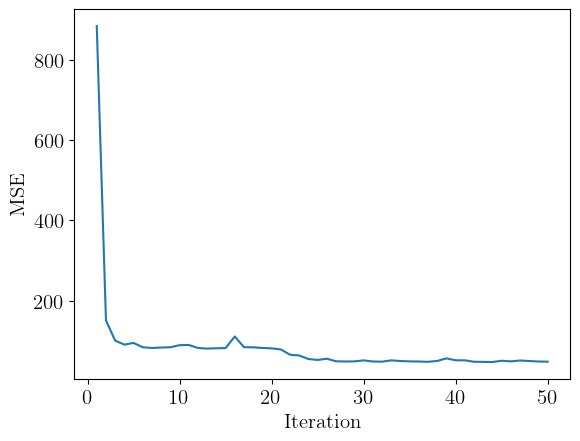

In [130]:
iteration = np.arange(1, len(lst_mse) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse)
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

We find the mean and standard deviation of all the MSEs are $83.13$ and $116.44$.

**Part B**

Now, we are going to use a normalized version of the data, repeat the process outlined in Part A, and compare the mean and standard deviation estimates with Part A.

In [131]:
#normalizing the predictor data
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [132]:
n_cols = predictors_norm.shape[1]

In [133]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [134]:
#initialize the model
model = regression_model()

In [135]:
lst_mse_norm = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors_norm, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 50, verbose = 2)
    predictions = model.predict(X_test)
    lst_mse_norm.append(mean_squared_error(y_test, predictions))
    print('iteration ' + str(i + 1))

Epoch 1/50
16/16 - 1s - 72ms/step - loss: 1529.0258 - val_loss: 1608.5792
Epoch 2/50
16/16 - 0s - 11ms/step - loss: 1515.5162 - val_loss: 1593.7762
Epoch 3/50
16/16 - 0s - 9ms/step - loss: 1502.3469 - val_loss: 1578.8571
Epoch 4/50
16/16 - 0s - 10ms/step - loss: 1488.9031 - val_loss: 1564.3099
Epoch 5/50
16/16 - 0s - 11ms/step - loss: 1475.8114 - val_loss: 1549.5465
Epoch 6/50
16/16 - 0s - 11ms/step - loss: 1462.3308 - val_loss: 1535.0078
Epoch 7/50
16/16 - 0s - 12ms/step - loss: 1448.9563 - val_loss: 1519.9421
Epoch 8/50
16/16 - 0s - 10ms/step - loss: 1435.0081 - val_loss: 1505.0463
Epoch 9/50
16/16 - 0s - 10ms/step - loss: 1421.5077 - val_loss: 1489.3309
Epoch 10/50
16/16 - 0s - 11ms/step - loss: 1407.2482 - val_loss: 1473.9125
Epoch 11/50
16/16 - 0s - 10ms/step - loss: 1392.9148 - val_loss: 1458.3069
Epoch 12/50
16/16 - 0s - 10ms/step - loss: 1378.4734 - val_loss: 1442.2085
Epoch 13/50
16/16 - 0s - 10ms/step - loss: 1363.5322 - val_loss: 1426.0320
Epoch 14/50
16/16 - 0s - 10ms/step 

In [136]:
print(np.mean(lst_mse_norm), np.std(lst_mse_norm))

68.04174520736284 89.97420091937322


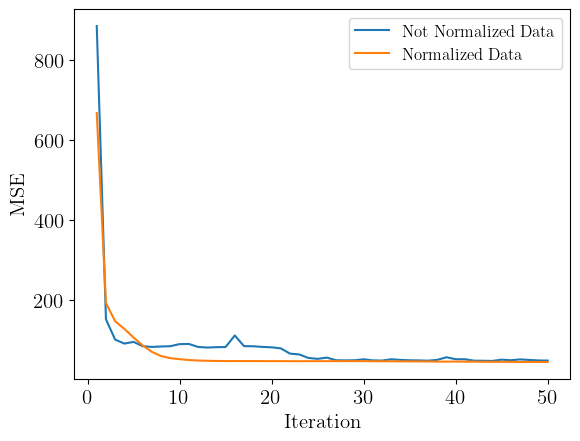

In [137]:
iteration = np.arange(1, len(lst_mse_norm) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse, label = 'Not Normalized Data')
plt.plot(iteration, lst_mse_norm, label = 'Normalized Data')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

We obtain the mean and standard deviation of the MSEs with normalized data to be $68.04$ and $89.97$. Mean MSE with normalized data is smaller than the mean MSE with unnormalized data.

**Part C**

We are going to repeat the steps outlined in Part B bt with a model with 100 epochs and then compare mean and standard deviations of MSEs.

In [138]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [139]:
#initialize the model
model = regression_model()

In [141]:
lst_mse_norm_epoch_100 = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors_norm, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 100, verbose = 2)
    predictions = model.predict(X_test)
    lst_mse_norm_epoch_100.append(mean_squared_error(y_test, predictions))

Epoch 1/100
16/16 - 1s - 45ms/step - loss: 1517.1202 - val_loss: 1588.0240
Epoch 2/100
16/16 - 0s - 7ms/step - loss: 1504.7249 - val_loss: 1574.9550
Epoch 3/100
16/16 - 0s - 7ms/step - loss: 1492.4550 - val_loss: 1561.8195
Epoch 4/100
16/16 - 0s - 7ms/step - loss: 1480.0524 - val_loss: 1548.7507
Epoch 5/100
16/16 - 0s - 7ms/step - loss: 1467.6433 - val_loss: 1535.5374
Epoch 6/100
16/16 - 0s - 7ms/step - loss: 1455.1105 - val_loss: 1522.2295
Epoch 7/100
16/16 - 0s - 7ms/step - loss: 1442.3870 - val_loss: 1508.5883
Epoch 8/100
16/16 - 0s - 7ms/step - loss: 1429.5724 - val_loss: 1494.7260
Epoch 9/100
16/16 - 0s - 7ms/step - loss: 1416.6030 - val_loss: 1480.5117
Epoch 10/100
16/16 - 0s - 7ms/step - loss: 1403.1442 - val_loss: 1466.2491
Epoch 11/100
16/16 - 0s - 7ms/step - loss: 1389.8295 - val_loss: 1451.1417
Epoch 12/100
16/16 - 0s - 7ms/step - loss: 1375.7285 - val_loss: 1436.3651
Epoch 13/100
16/16 - 0s - 7ms/step - loss: 1361.6980 - val_loss: 1420.9303
Epoch 14/100
16/16 - 0s - 7ms/ste

In [142]:
print(np.mean(lst_mse_norm_epoch_100), np.std(lst_mse_norm_epoch_100))


50.159768005017206 24.27250129357662


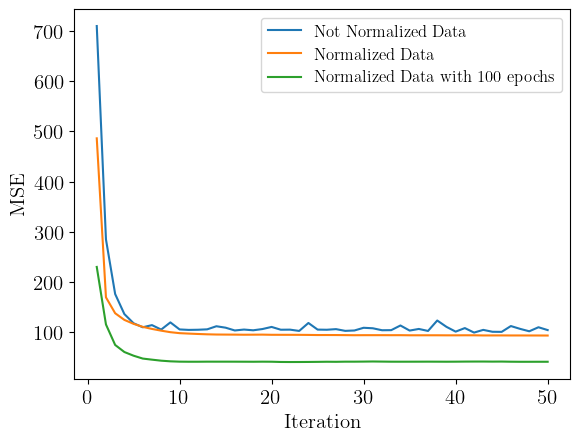

In [ ]:
iteration = np.arange(1, len(lst_mse_norm) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse, label = 'Not Normalized Data')
plt.plot(iteration, lst_mse_norm, label = 'Normalized Data')
plt.plot(iteration, lst_mse_norm_epoch_100, label = 'Normalized Data with 100 epochs')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

We obtain the mean and standard deviation of the MSEs with normalized data to be $50.16$ and $24.27$. Mean and standard deviation of MSE with 100 epochs is smaller than Part B.

**Part D**

In this part, we are going to modify the neural network model. We will build a model with three hidden layers with 10 nodes each, and ReLU as activation function.

In [120]:
#build the neural network

def regression_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [121]:
#initialize the model
model = regression_model()

In [122]:
lst_mse_norm_layers = []

for i in range(50):
    X_tr, X_test, y_tr, y_test = train_test_split(predictors_norm, target, test_size = 0.3, random_state = 0)
    model.fit(X_tr, y_tr, validation_split = 0.3, epochs = 50, verbose = 2)
    predictions = model.predict(X_test)
    lst_mse_norm_layers.append(mean_squared_error(y_test, predictions))

Epoch 1/50
16/16 - 4s - 237ms/step - loss: 1549.1156 - val_loss: 1617.0819
Epoch 2/50
16/16 - 0s - 10ms/step - loss: 1530.3577 - val_loss: 1597.4546
Epoch 3/50
16/16 - 0s - 16ms/step - loss: 1510.4839 - val_loss: 1574.5554
Epoch 4/50
16/16 - 0s - 17ms/step - loss: 1486.1141 - val_loss: 1546.4492
Epoch 5/50
16/16 - 0s - 17ms/step - loss: 1455.2052 - val_loss: 1510.3617
Epoch 6/50
16/16 - 0s - 18ms/step - loss: 1415.5203 - val_loss: 1462.6436
Epoch 7/50
16/16 - 0s - 15ms/step - loss: 1362.7534 - val_loss: 1400.2473
Epoch 8/50
16/16 - 0s - 15ms/step - loss: 1293.9707 - val_loss: 1318.9923
Epoch 9/50
16/16 - 0s - 17ms/step - loss: 1206.5585 - val_loss: 1215.1365
Epoch 10/50
16/16 - 0s - 14ms/step - loss: 1099.1827 - val_loss: 1088.5203
Epoch 11/50
16/16 - 0s - 16ms/step - loss: 972.1597 - val_loss: 947.1415
Epoch 12/50
16/16 - 0s - 17ms/step - loss: 834.5174 - val_loss: 792.9427
Epoch 13/50
16/16 - 0s - 17ms/step - loss: 687.7790 - val_loss: 639.9139
Epoch 14/50
16/16 - 0s - 16ms/step - lo

In [143]:
print(np.mean(lst_mse_norm_layers), np.std(lst_mse_norm_layers))


45.840794181103874 20.162423993338262


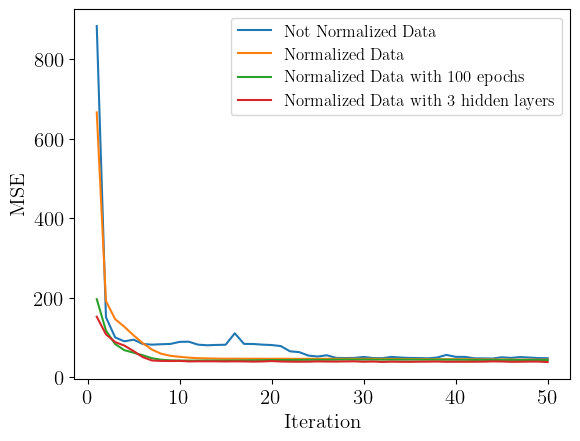

In [144]:
iteration = np.arange(1, len(lst_mse_norm) + 1, 1)

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif')

plt.plot(iteration, lst_mse, label = 'Not Normalized Data')
plt.plot(iteration, lst_mse_norm, label = 'Normalized Data')
plt.plot(iteration, lst_mse_norm_epoch_100, label = 'Normalized Data with 100 epochs')
plt.plot(iteration, lst_mse_norm_layers, label = 'Normalized Data with 3 hidden layers')
plt.xlabel('Iteration', fontsize = 15)
plt.ylabel('MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 12)
plt.show()

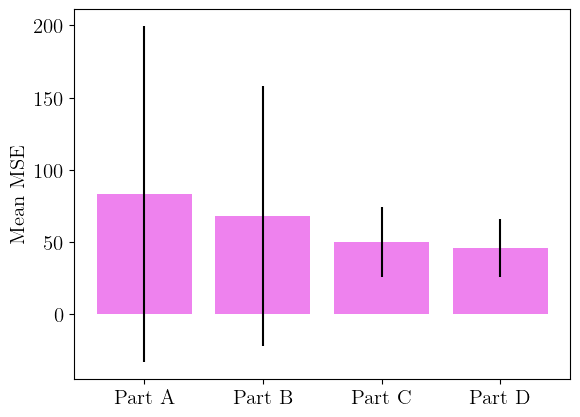

In [155]:
categories = ['Part A', 'Part B', 'Part C', 'Part D']

mse = [np.mean(lst_mse), np.mean(lst_mse_norm), np.mean(lst_mse_norm_epoch_100), np.mean(lst_mse_norm_layers)]
std = [np.std(lst_mse), np.std(lst_mse_norm), np.std(lst_mse_norm_epoch_100), np.std(lst_mse_norm_layers)]

# Create the bar plot
plt.bar(categories, mse, yerr = std, color = 'violet')

# Add labels and title
plt.ylabel('Mean MSE', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)


# Show the plot
plt.show()


We notice that mean and standard deviation of MSE decreases from Part A through D.